In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in dataset
billion_df = pd.read_csv("Resources/billionaires.csv", index_col="rank", encoding='UTF-8')

billion_df.head()

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [3]:
# Print industry count
industry_unique = billion_df['industries'].nunique()
print(f'According to the dataset, there are {industry_unique} industries that have produced billionaires.')

According to the dataset, there are 18 industries that have produced billionaires.


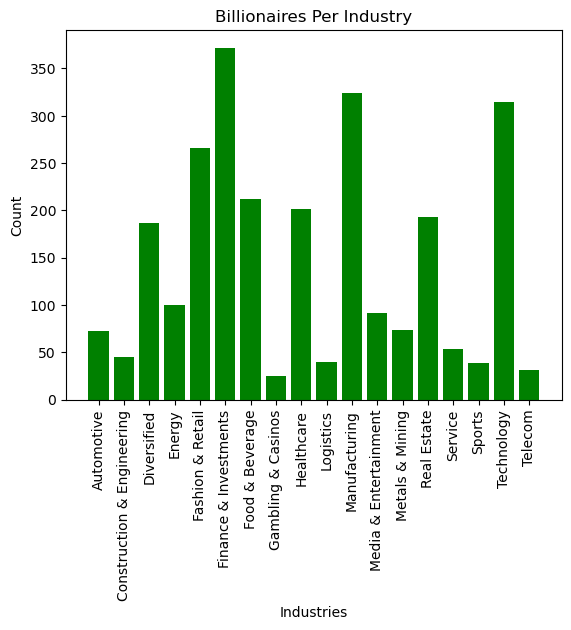

In [4]:
# Create bar chart for industries
industry_group = billion_df.groupby('industries')
industry_count = industry_group['personName'].count()
industry_count_df = pd.DataFrame(industry_count).rename(columns={'personName' : 'count'})
industry_count_df.reset_index(inplace=True)
x_axis = np.arange(industry_count_df['industries'].nunique())
plt.bar(x_axis, industry_count_df['count'], align='center', color='green')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, industry_count_df['industries'], rotation=90)
plt.xlabel('Industries')
plt.ylabel('Count')
plt.title('Billionaires Per Industry')
plt.show()

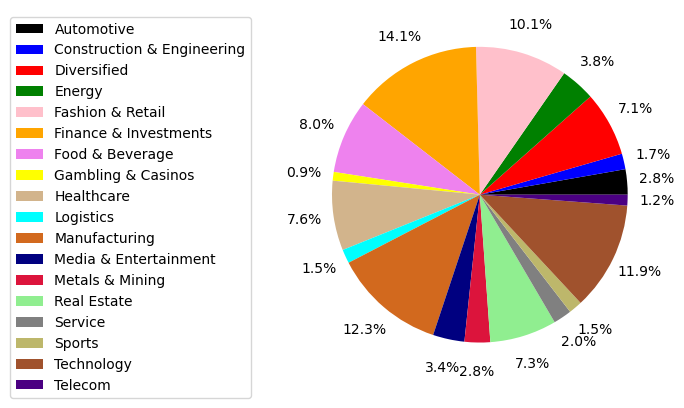

In [5]:
# Create pie chart for industries
labels = industry_count_df['industries']
colors = ['black','blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(industry_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.show()

In [6]:
# Add column for birth year grouping
bins = [1920, 1924.9, 1929.9, 1934.9, 1939.9, 1944.9, 1949.9, 1954.9, 1959.9, 1964.9, 1969.9, 1974.9, 1979.9, 1984.9, 1989.9, 1994.9, 1999.9, 2004.9, 2009.9]
group_names = ['1920','1925','1930','1935','1940','1945','1950','1955','1960','1965','1970','1975',
               '1980','1985','1990','1995','2000','2005']
year_df = billion_df.dropna(subset=['birthYear'])


# Slice the data and place it into bins
year_df["Birth Group"] = pd.cut(year_df["birthYear"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
year_df

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Birth Group
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,1945
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1970
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1960
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1940
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,NaN,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1970
2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,NaN,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1940
2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,NaN,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1960


In [7]:
# Get a count of each birth group
hist_group = year_df.groupby('Birth Group').count()
hist_df = pd.DataFrame(hist_group['personName']).reset_index().rename(columns={'personName' : 'Count'})
hist_df

,Birth Group,Count
0,1920,7
1,1925,31
2,1930,65
3,1935,132
4,1940,235
5,1945,290
6,1950,323
7,1955,339
8,1960,365
9,1965,345


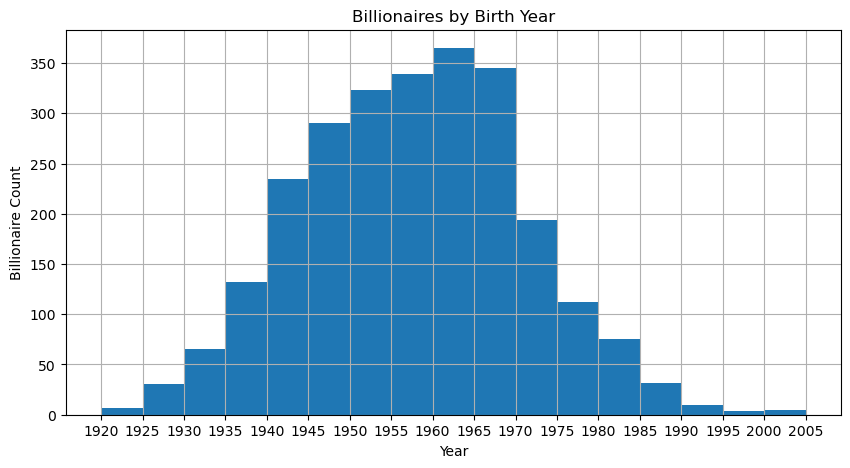

In [8]:
# Create histogram for Birth year
hist = year_df['Birth Group'].sort_values(ascending=True).hist(figsize=(10,5), xrot=0, bins=group_names, grid=True, xlabelsize=10)
plt.title('Billionaires by Birth Year')
plt.xlabel('Year')
plt.ylabel('Billionaire Count')
plt.show()


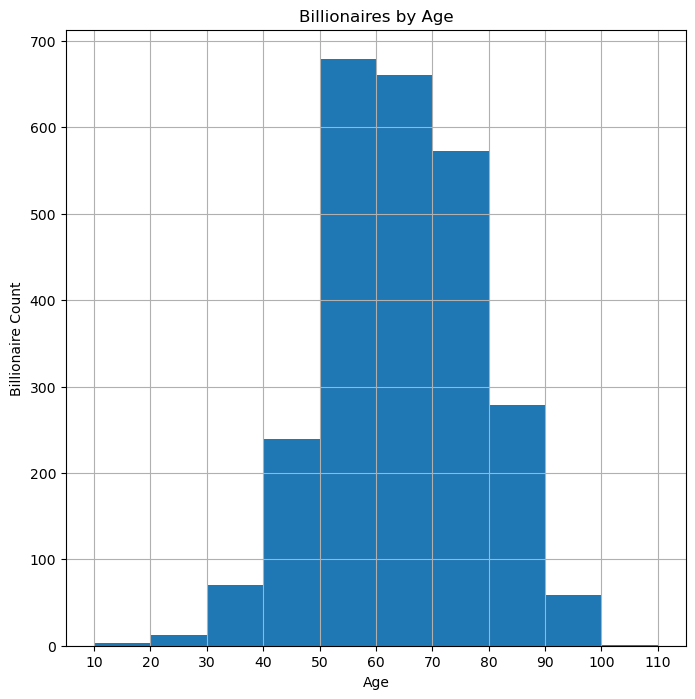

In [9]:
# Add column for age grouping
bins = [10,20,30,40,50,60,70,80,90,100,110,120]
group_names = ['10','20','30','40','50','60','70',
               '80','90','100','110']

age_df = billion_df.dropna(subset=['age'])
# Slice the data and place it into bins
age_df["Age Group"] = pd.cut(age_df["age"], 
                                        bins, labels=group_names, 
                                        include_lowest=True)

hist = age_df['Age Group'].sort_values(ascending=True).hist(figsize=(8,8), xrot=0, bins=group_names, grid=True, xlabelsize=10)
plt.title('Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Billionaire Count')
plt.show()


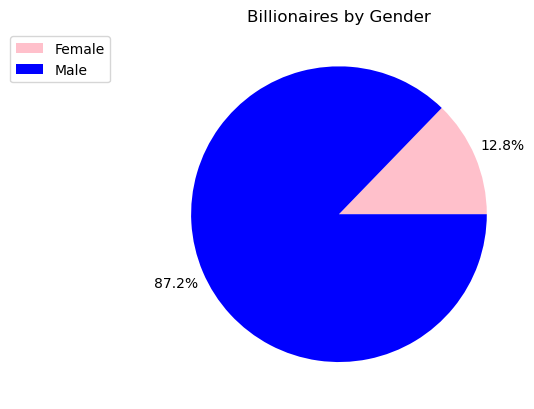

In [10]:
# Create pie chart for gender
gender_group = billion_df.groupby('gender')
gender_count = gender_group['personName'].count()
gender_count_df = pd.DataFrame(gender_count).rename(columns={'personName' : 'count'}).sort_values(by='gender')
gender_count_df.reset_index(inplace=True)
labels = ['Female', 'Male']
colors = ['pink', 'blue']
plt.pie(gender_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Billionaires by Gender")
plt.show()

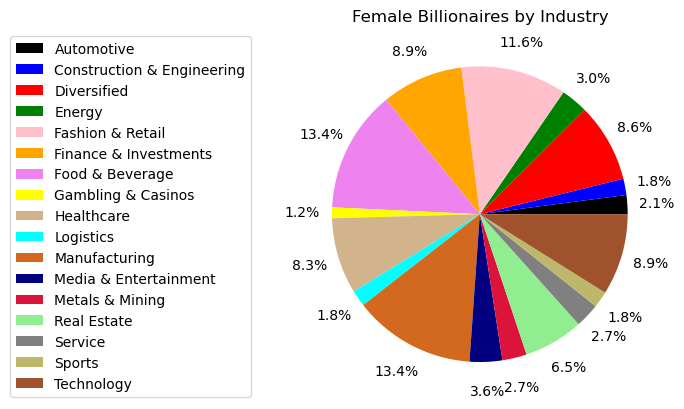

In [11]:
# Get female industry info
female_df = billion_df.loc[billion_df['gender'] == 'F' ]
f_industry_group = female_df.groupby('industries')
f_industry_count = f_industry_group['personName'].count()
f_industry_count_df = pd.DataFrame(f_industry_count).rename(columns={'personName' : 'count'})
f_industry_count_df.reset_index(inplace=True)

labels = f_industry_count_df['industries']
colors = ['black','blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(f_industry_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Female Billionaires by Industry")
plt.show()

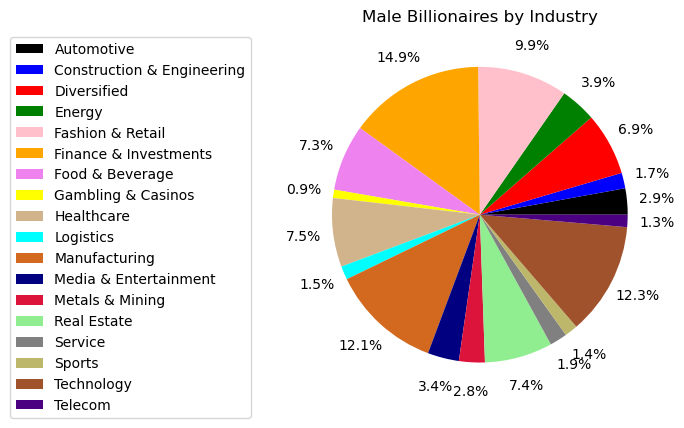

In [12]:
# Get male industry info
male_df = billion_df.loc[billion_df['gender'] == 'M' ]
m_industry_group = male_df.groupby('industries')
m_industry_count = m_industry_group['personName'].count()
m_industry_count_df = pd.DataFrame(m_industry_count).rename(columns={'personName' : 'count'})
m_industry_count_df.reset_index(inplace=True)

labels = m_industry_count_df['industries']
colors = ['black','blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(m_industry_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Male Billionaires by Industry")
plt.show()

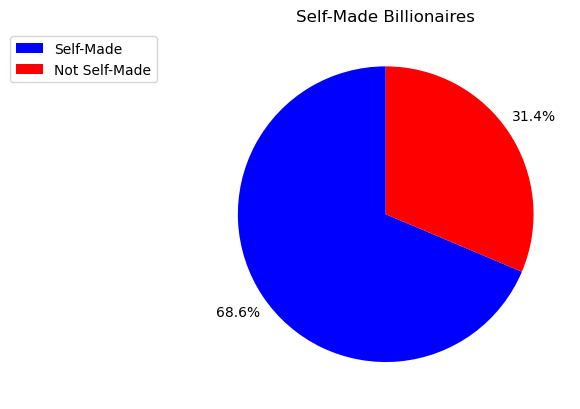

In [13]:
# Self made pie chart
self_group = billion_df.groupby('selfMade')
self_count = self_group['personName'].count()
self_count_df = pd.DataFrame(self_count).rename(columns={'personName' : 'count'})
self_count_df.reset_index(inplace=True)
self_count_df= self_count_df.sort_values(by='selfMade', ascending=False)

labels = ['Self-Made', 'Not Self-Made']
colors = ['blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(self_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors,startangle=90)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Self-Made Billionaires")
plt.show()

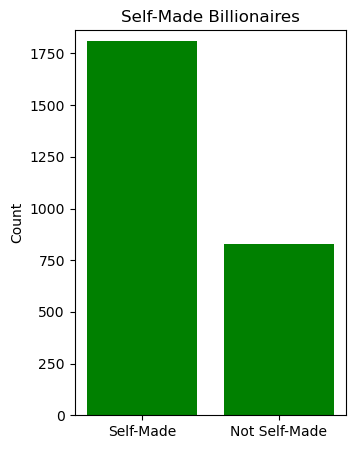

In [14]:
#  Self made info bar chart
x_axis = np.arange(self_count_df['selfMade'].nunique())
self_limit = self_count_df['count'].max()
labels = ['Self-Made', 'Not Self-Made']
plt.figure(figsize=(3.5,5))
plt.bar(x_axis, self_count_df['count'], color='green')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.ylabel('Count')
plt.title('Self-Made Billionaires')
plt.ylim(0,self_limit+50)
plt.show()

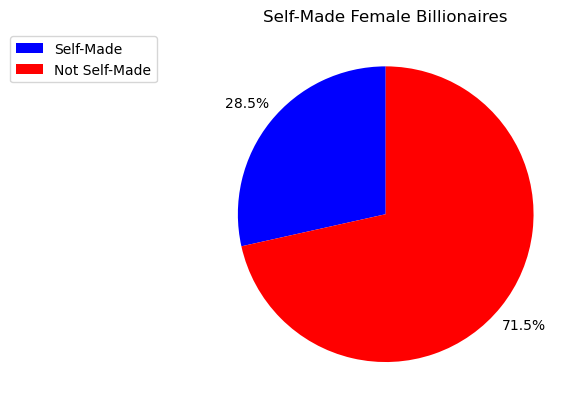

In [15]:
#  Female self made info pie chart
f_self_group = female_df.groupby('selfMade')
f_self_count = f_self_group['personName'].count()
f_self_count_df = pd.DataFrame(f_self_count).rename(columns={'personName' : 'count'})
f_self_count_df.reset_index(inplace=True)
f_self_count_df= f_self_count_df.sort_values(by='selfMade', ascending=False)

labels = ['Self-Made', 'Not Self-Made']
colors = ['blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(f_self_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors,startangle=90)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Self-Made Female Billionaires")
plt.show()

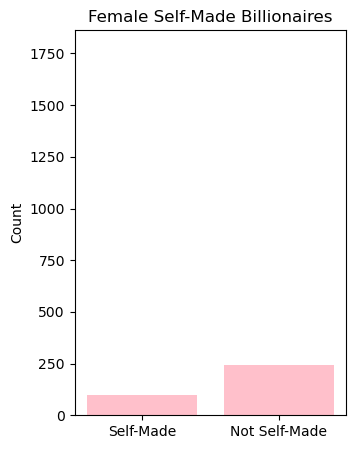

In [16]:
#  Female self made info bar chart
x_axis = np.arange(f_self_count_df['selfMade'].nunique())
labels = ['Self-Made', 'Not Self-Made']
plt.figure(figsize=(3.5,5))
plt.bar(x_axis, f_self_count_df['count'], color='pink')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.ylabel('Count')
plt.title('Female Self-Made Billionaires')
plt.ylim(0,self_limit+50)
plt.show()

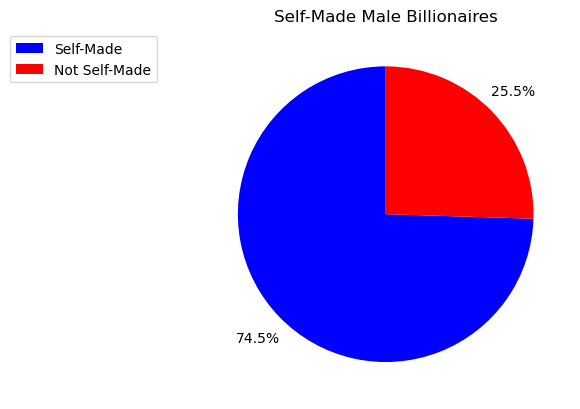

In [17]:
#  Male self made pie chart
m_self_group = male_df.groupby('selfMade')
m_self_count = m_self_group['personName'].count()
m_self_count_df = pd.DataFrame(m_self_count).rename(columns={'personName' : 'count'})
m_self_count_df.reset_index(inplace=True)
m_self_count_df= m_self_count_df.sort_values(by='selfMade', ascending=False)

labels = ['Self-Made', 'Not Self-Made']
colors = ['blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(m_self_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors, startangle=90)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.title("Self-Made Male Billionaires")
plt.show()

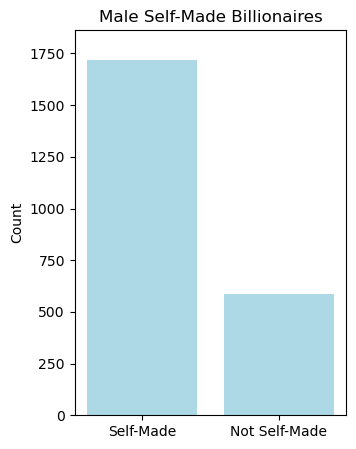

In [18]:
#  Male self made bar chart
x_axis = np.arange(m_self_count_df['selfMade'].nunique())
labels = ['Self-Made', 'Not Self-Made']
plt.figure(figsize=(3.5,5))
plt.bar(x_axis, m_self_count_df['count'], color='lightblue')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.ylabel('Count')
plt.title('Male Self-Made Billionaires')
plt.ylim(0,self_limit+50)
plt.show()

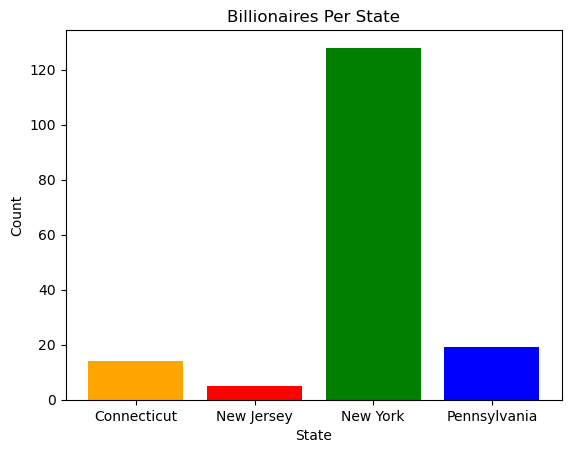

In [19]:
# State bar chart
state_group = billion_df.groupby('state')
state_count = state_group['personName'].count()
all_state_count_df = pd.DataFrame(state_count).rename(columns={'personName' : 'count'})
all_state_count_df.reset_index(inplace=True)
all_state_count_df = all_state_count_df.dropna(subset=['state'])
state_count_df = all_state_count_df.loc[(all_state_count_df['state'] == 'New York') |
                                        (all_state_count_df['state'] == 'New Jersey') |
                                        (all_state_count_df['state'] == 'Pennsylvania') |
                                        (all_state_count_df['state'] == 'Connecticut')]
x_axis = np.arange(state_count_df['state'].nunique())
color = ['orange', 'red', 'green', 'blue']
plt.bar(x_axis, state_count_df['count'], align='center', color=color)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_count_df['state'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Billionaires Per State')
plt.show()

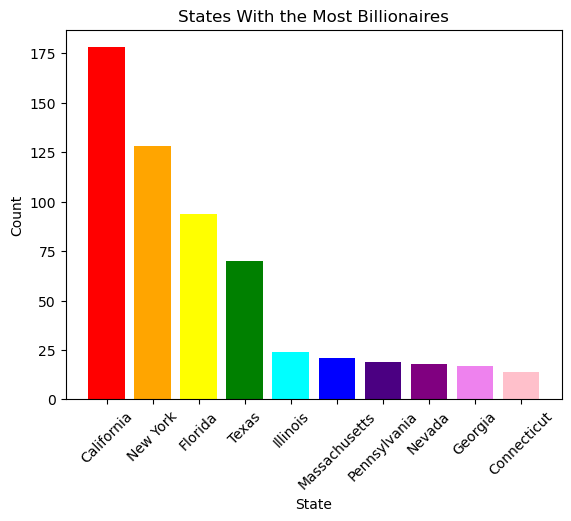

: 

In [20]:
# Top 10 States
top_states_df = all_state_count_df.sort_values(by='count', ascending=False).iloc[:10]
x_axis = np.arange(top_states_df['state'].nunique())
color = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo','purple','violet', 'pink']
plt.bar(x_axis, top_states_df['count'], align='center', color=color)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_states_df['state'], rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('States With the Most Billionaires')
plt.show()